In [29]:
from datetime import datetime
from datetime import timezone
import polars as pl
import os
from plot_data import plot_sensor_measurement, plot_sensor_calibration, plot_wind_rose


start_date = datetime(2023, 10, 13, 0, 0, 0).replace(tzinfo=timezone.utc)
end_date = datetime(2023, 10, 14, 23, 59, 59).replace(tzinfo=timezone.utc)

sensor_id = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20]
data_directory = "../data/"


In [30]:
df = pl.scan_parquet(os.path.join(data_directory, "pivot_measurements.parquet"))

df = df.sort("creation_timestamp").filter(pl.col("creation_timestamp").is_between(start_date, end_date))

df.tail(3).collect()

shape: (3, 37)
┌───────────┬──────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ system_na ┆ revision ┆ creation_t ┆ receipt_ti ┆ … ┆ cal_sht45_ ┆ cal_gmp343 ┆ cal_bme280 ┆ cal_bottle │
│ me        ┆ ---      ┆ imestamp   ┆ mestamp    ┆   ┆ humidity   ┆ _temperatu ┆ _humidity  ┆ _id        │
│ ---       ┆ i32      ┆ ---        ┆ ---        ┆   ┆ ---        ┆ re         ┆ ---        ┆ ---        │
│ str       ┆          ┆ datetime[n ┆ datetime[n ┆   ┆ f64        ┆ ---        ┆ f64        ┆ f64        │
│           ┆          ┆ s, UTC]    ┆ s, UTC]    ┆   ┆            ┆ f64        ┆            ┆            │
╞═══════════╪══════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ tum-esm-m ┆ 8        ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 21:36:15.2 ┆ 21:36:16.6 ┆   ┆            ┆            ┆            ┆            │
│ spi-12    ┆          ┆ 50 UTC     ┆ 80109 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 13       ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 21:36:17.0 ┆ 21:36:17.7 ┆   ┆            ┆            ┆            ┆            │
│ spi-8     ┆          ┆ 70 UTC     ┆ 40594 UTC  ┆   ┆            ┆            ┆            ┆            │
│ tum-esm-m ┆ 29       ┆ 2023-10-14 ┆ 2023-10-14 ┆ … ┆ null       ┆ null       ┆ null       ┆ null       │
│ idcost-ra ┆          ┆ 21:36:17.5 ┆ 21:36:17.9 ┆   ┆            ┆            ┆            ┆            │
│ spi-5     ┆          ┆ 70 UTC     ┆ 85172 UTC  ┆   ┆            ┆            ┆            ┆            │
└───────────┴──────────┴────────────┴────────────┴───┴────────────┴────────────┴────────────┴────────────┘

In [31]:
df_cal = pl.scan_parquet(os.path.join(data_directory, "calibration_correction.parquet"))

df_cal.head(3).collect()

shape: (3, 8)
┌────────────┬───────────┬────────────┬────────────┬────────────┬────────────┬──────────┬─────────┐
│ creation_t ┆ system_na ┆ mean_cal_4 ┆ mean_cal_8 ┆ cal_bottle ┆ cal_bottle ┆ slope    ┆ interce │
│ imestamp   ┆ me        ┆ 00         ┆ 00         ┆ _id_400    ┆ _id_800    ┆ ---      ┆ pt      │
│ ---        ┆ ---       ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ f64      ┆ ---     │
│ date       ┆ str       ┆ f64        ┆ f64        ┆ f64        ┆ f64        ┆          ┆ f64     │
╞════════════╪═══════════╪════════════╪════════════╪════════════╪════════════╪══════════╪═════════╡
│ 2023-06-28 ┆ tum-esm-m ┆ 416.809259 ┆ 799.892308 ┆ 8.0        ┆ 33.0       ┆ 1.016285 ┆ -6.1796 │
│            ┆ idcost-ra ┆            ┆            ┆            ┆            ┆          ┆ 32      │
│            ┆ spi-9     ┆            ┆            ┆            ┆            ┆          ┆         │
│ 2023-06-28 ┆ tum-esm-m ┆ 404.709259 ┆ 793.105128 ┆ 26.0       ┆ 37.0       ┆ 1.027683 ┆ -12.864 │
│            ┆ idcost-ra ┆            ┆            ┆            ┆            ┆          ┆ 598     │
│            ┆ spi-7     ┆            ┆            ┆            ┆            ┆          ┆         │
│ 2023-06-29 ┆ tum-esm-m ┆ 395.46     ┆ 786.52963  ┆ 22.0       ┆ 35.0       ┆ 1.027002 ┆ 0.53811 │
│            ┆ idcost-ra ┆            ┆            ┆            ┆            ┆          ┆ 1       │
│            ┆ spi-5     ┆            ┆            ┆            ┆            ┆          ┆         │
└────────────┴───────────┴────────────┴────────────┴────────────┴────────────┴──────────┴─────────┘

In [32]:
dfg = df.groupby_dynamic("creation_timestamp", every="1h", by="system_name").agg(pl.col("gmp343_filtered").mean())

dfg.tail(3).collect()

shape: (3, 3)
┌──────────────────────────┬─────────────────────────┬─────────────────┐
│ system_name              ┆ creation_timestamp      ┆ gmp343_filtered │
│ ---                      ┆ ---                     ┆ ---             │
│ str                      ┆ datetime[ns, UTC]       ┆ f64             │
╞══════════════════════════╪═════════════════════════╪═════════════════╡
│ tum-esm-midcost-raspi-10 ┆ 2023-10-14 19:00:00 UTC ┆ 444.847222      │
│ tum-esm-midcost-raspi-10 ┆ 2023-10-14 20:00:00 UTC ┆ 439.522905      │
│ tum-esm-midcost-raspi-10 ┆ 2023-10-14 21:00:00 UTC ┆ 444.948848      │
└──────────────────────────┴─────────────────────────┴─────────────────┘

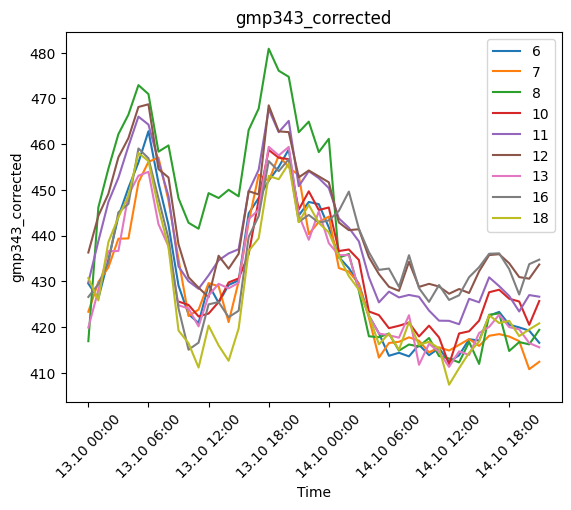

In [34]:
def calibration_correction(date,name,item):
    try:
        intercept = df_cal.filter(pl.col('system_name') == name) \
            .filter(pl.col('creation_timestamp') < date).last() \
            .select("intercept").collect().item()
        slope = df_cal.filter(pl.col('system_name') == name) \
            .filter(pl.col('creation_timestamp') < date).last() \
            .select("slope").collect().item()
        
        return item * slope + intercept
    except:
        return None


df_m = dfg.filter(pl.col("gmp343_filtered") > 0) \
        .with_columns(pl.struct(['creation_timestamp','system_name','gmp343_filtered']) \
        .apply(lambda x: calibration_correction(x['creation_timestamp'],x['system_name'],x['gmp343_filtered'])) \
        .alias('gmp343_corrected'))

plot_sensor_measurement(df_m.collect(),col_name="gmp343_corrected",sensor_id=[6,7,8,10,11,12,13,16,18],filter='1h')

In [6]:
df = df.collect()

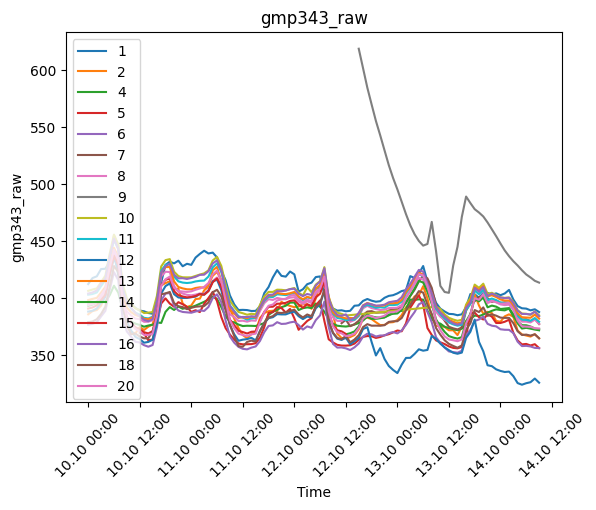

In [7]:
plot_sensor_measurement(df,col_name="gmp343_raw",sensor_id=sensor_id,filter='1h')

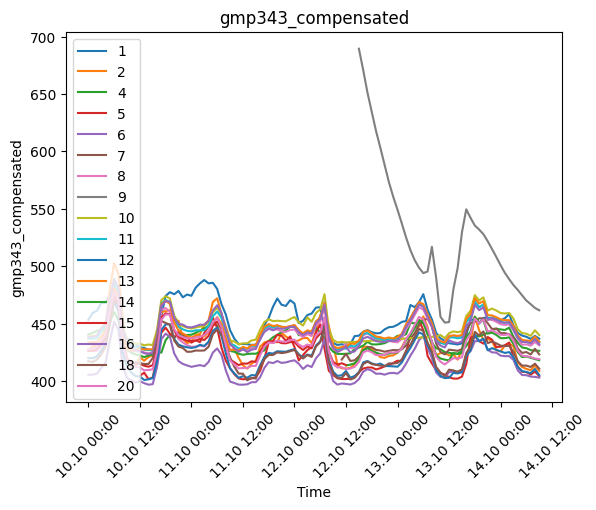

In [8]:
plot_sensor_measurement(df,col_name="gmp343_compensated",sensor_id=sensor_id,filter='1h')

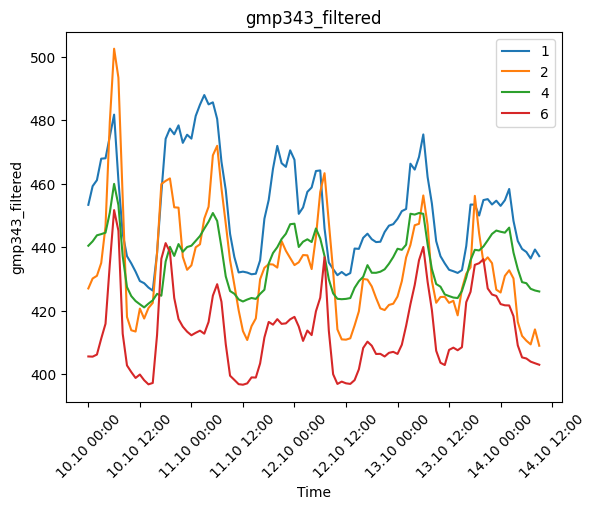

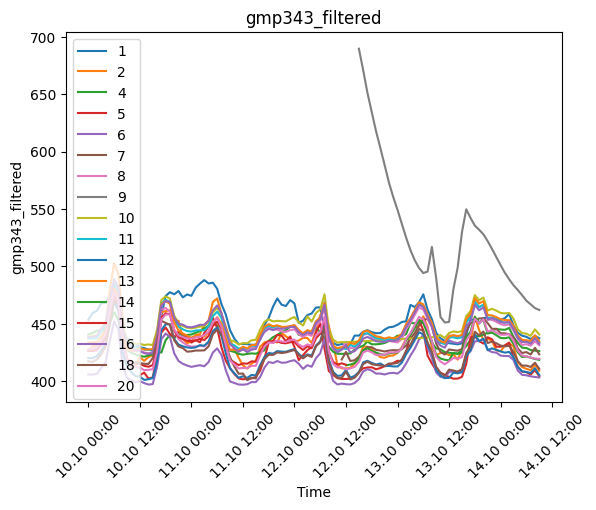

In [9]:
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=[1,2,3,4,6],filter='1h')
plot_sensor_measurement(df,col_name="gmp343_filtered",sensor_id=sensor_id,filter='1h')

In [10]:
# Maisach
plot_wind_rose(df,1, 'Maisach')
# Rechts-der-Isar
plot_wind_rose(df,2, 'Rechts-der-Isar')
# Finsing
plot_wind_rose(df,3, 'Finsing')
# Großhadern
plot_wind_rose(df,4, 'Großhadern')
# Großhadern
plot_wind_rose(df,5, 'Pasing')
# plot wind at 3m pole inlet
plot_wind_rose(df,7, 'TUM')

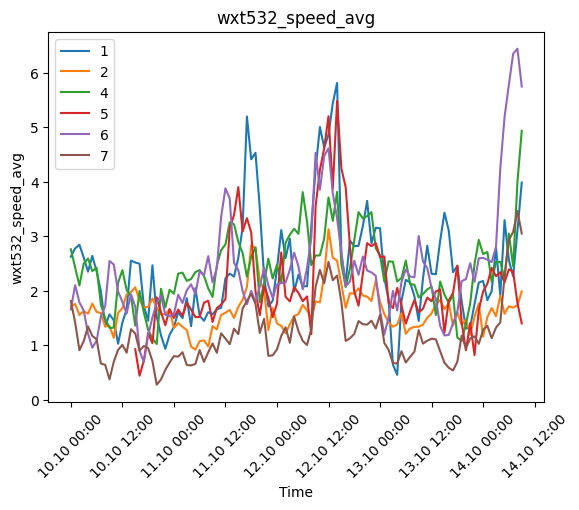

In [11]:
plot_sensor_measurement(df,col_name="wxt532_speed_avg",sensor_id=sensor_id,filter='1h')

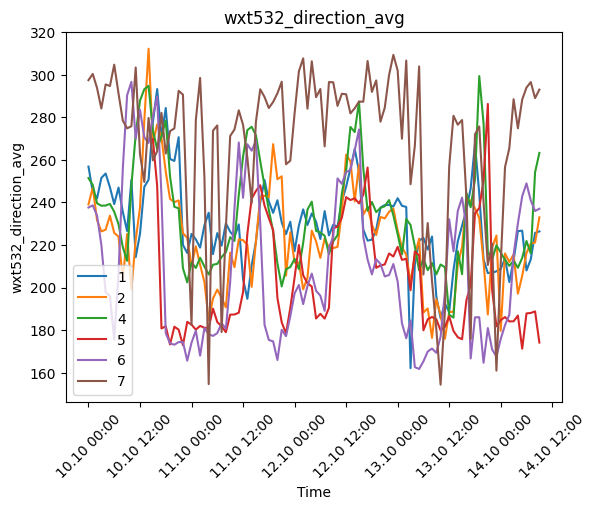

In [12]:
plot_sensor_measurement(df,col_name="wxt532_direction_avg",sensor_id=sensor_id,filter='1h')

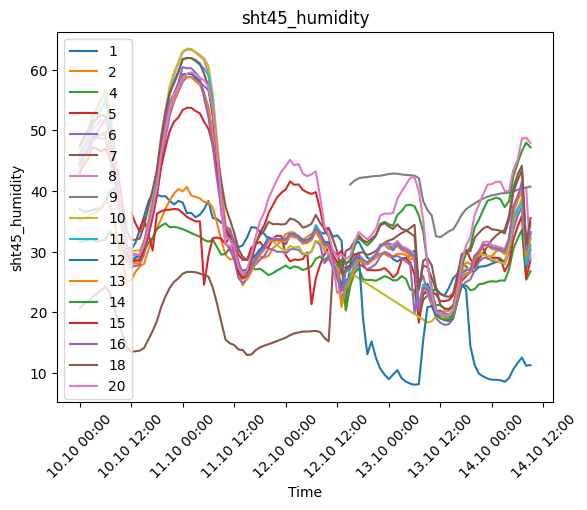

In [13]:
# Plot auxilliary data
plot_sensor_measurement(df,col_name="sht45_humidity",sensor_id=sensor_id,filter='1h')

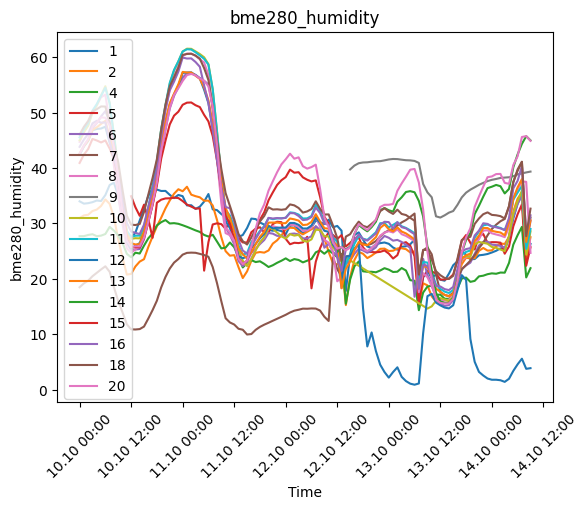

In [14]:
plot_sensor_measurement(df,col_name="bme280_humidity",sensor_id=sensor_id,filter='1h')

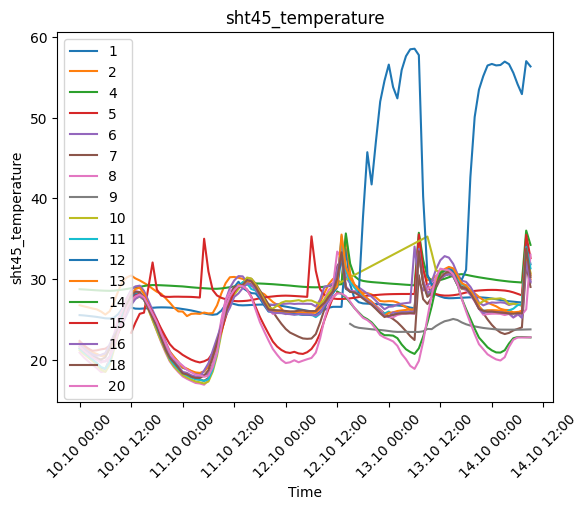

In [15]:
plot_sensor_measurement(df,col_name="sht45_temperature",sensor_id=sensor_id,filter='1h')

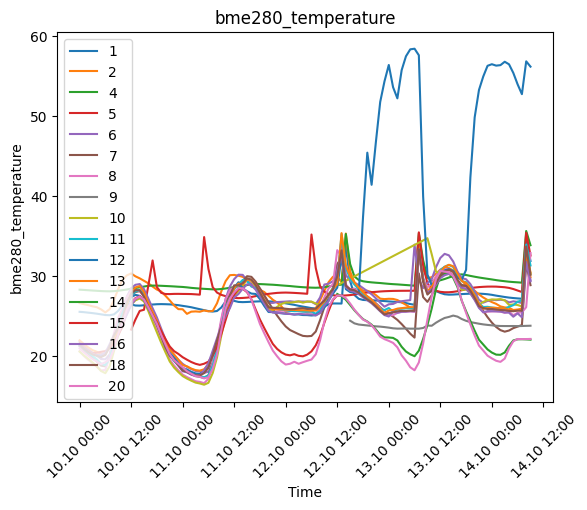

In [16]:
plot_sensor_measurement(df,col_name="bme280_temperature",sensor_id=sensor_id,filter='1h')

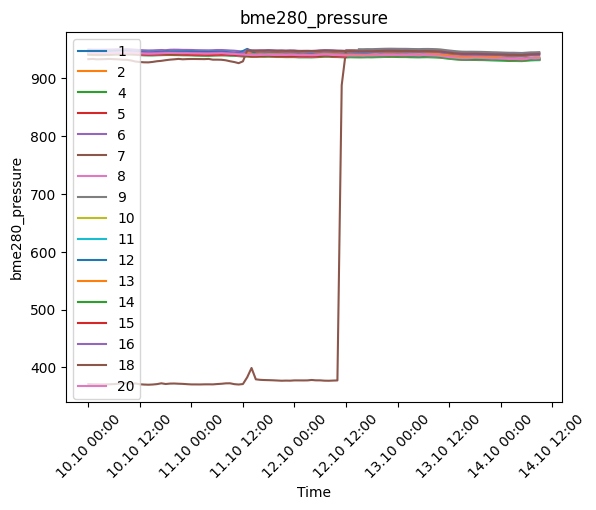

In [17]:
plot_sensor_measurement(df,col_name="bme280_pressure",sensor_id=sensor_id,filter='1h')

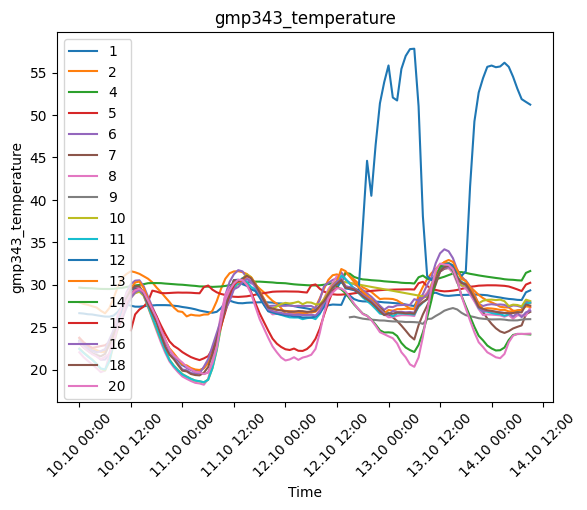

In [18]:
plot_sensor_measurement(df,col_name="gmp343_temperature",sensor_id=sensor_id,filter='1h')

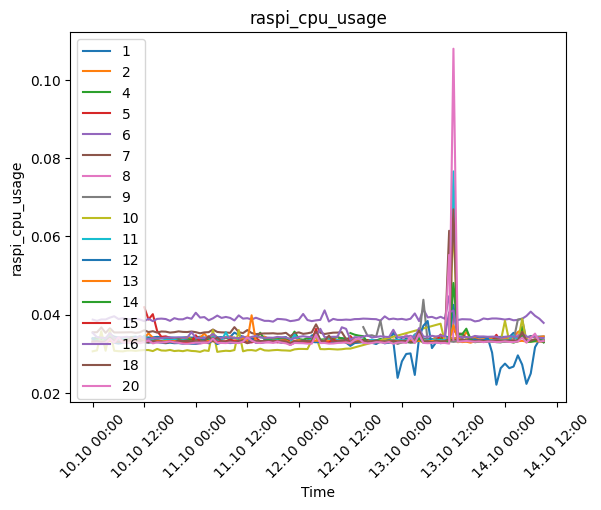

In [19]:
plot_sensor_measurement(df,col_name="raspi_cpu_usage",sensor_id=sensor_id,filter='1h')

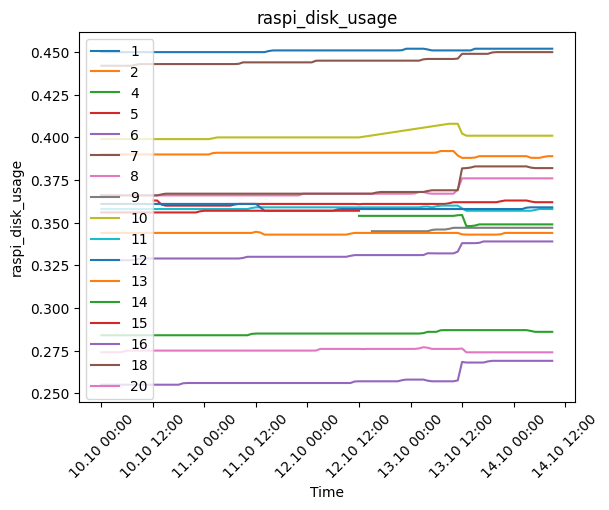

In [20]:
plot_sensor_measurement(df,col_name="raspi_disk_usage",sensor_id=sensor_id,filter='1h')

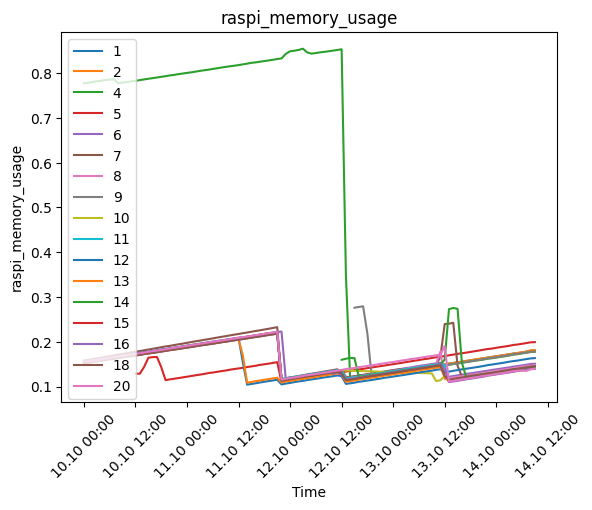

In [21]:
plot_sensor_measurement(df,col_name="raspi_memory_usage",sensor_id=sensor_id,filter='1h')

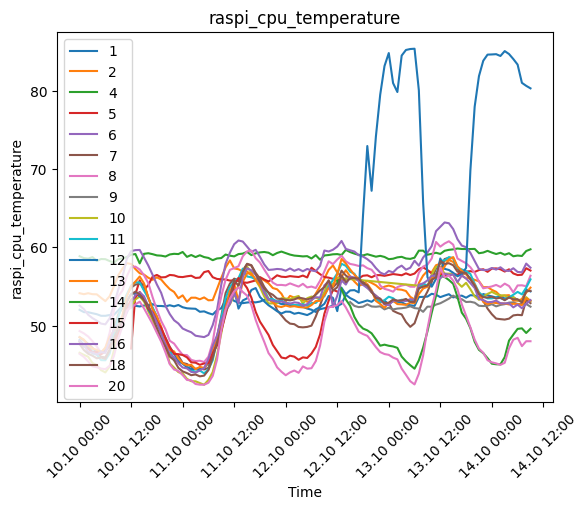

In [22]:
plot_sensor_measurement(df,col_name="raspi_cpu_temperature",sensor_id=sensor_id,filter='1h')

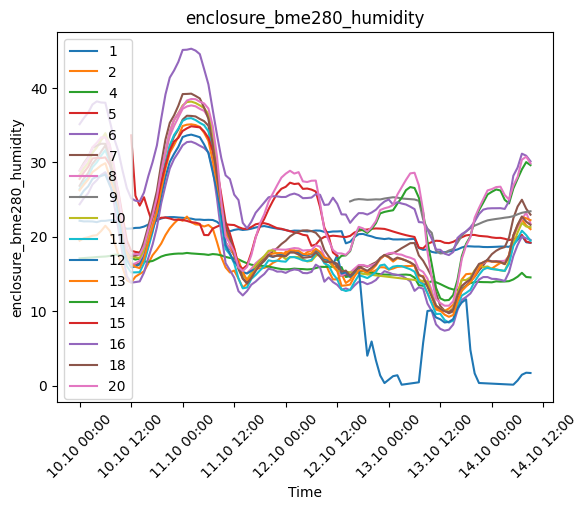

In [23]:
plot_sensor_measurement(df,col_name="enclosure_bme280_humidity",sensor_id=sensor_id,filter='1h')

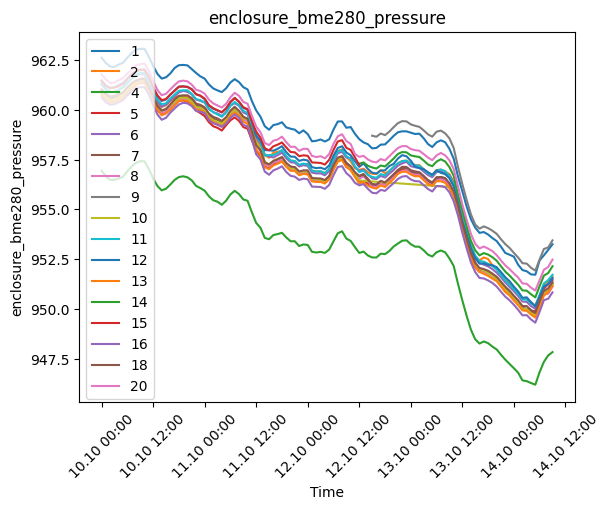

In [24]:
plot_sensor_measurement(df,col_name="enclosure_bme280_pressure",sensor_id=sensor_id,filter='1h')

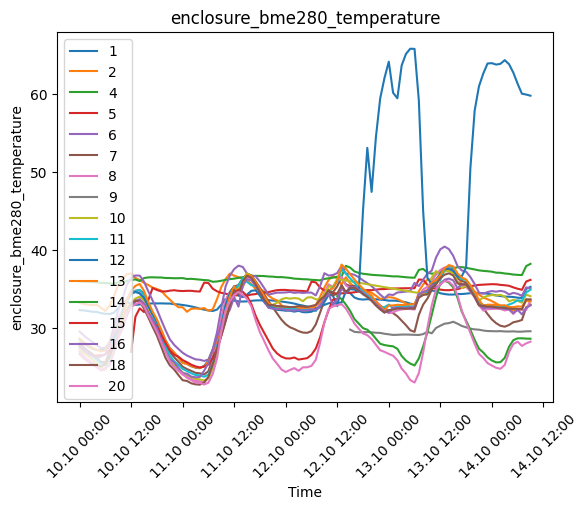

In [25]:
plot_sensor_measurement(df,col_name="enclosure_bme280_temperature",sensor_id=sensor_id,filter='1h')

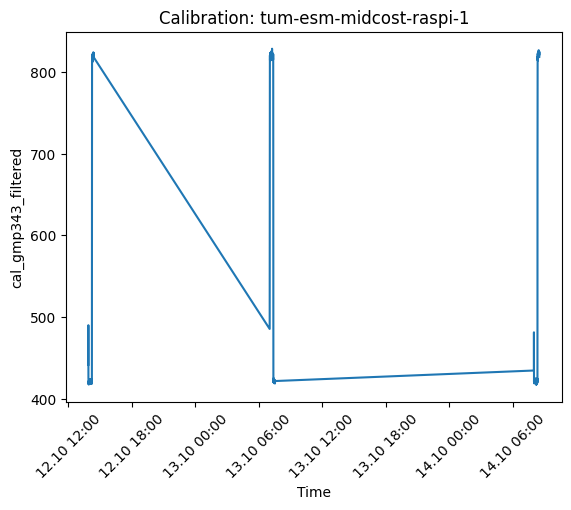

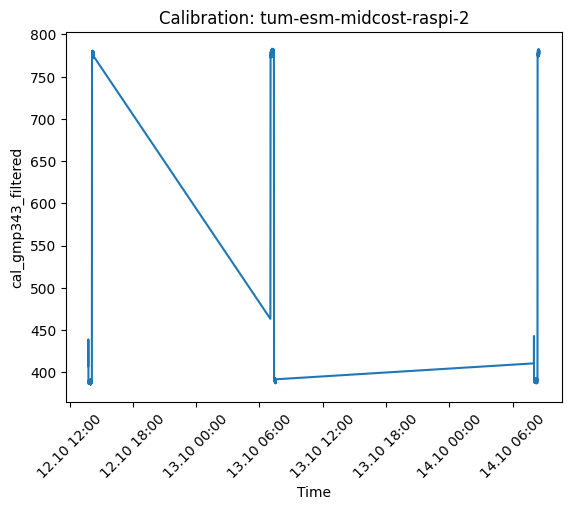

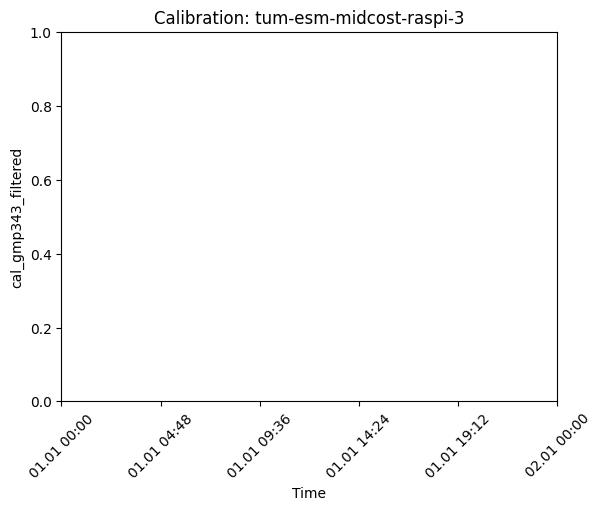

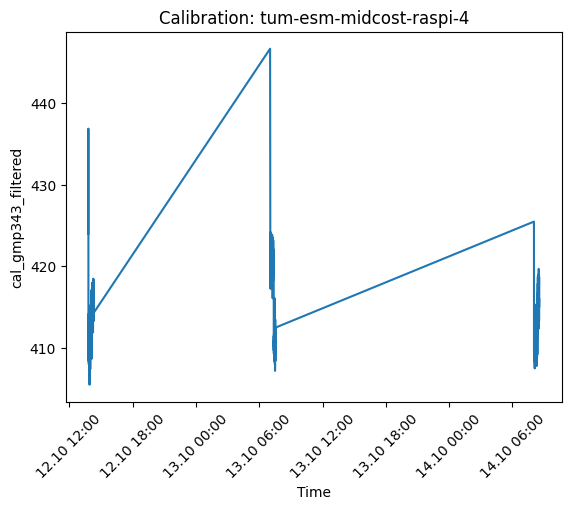

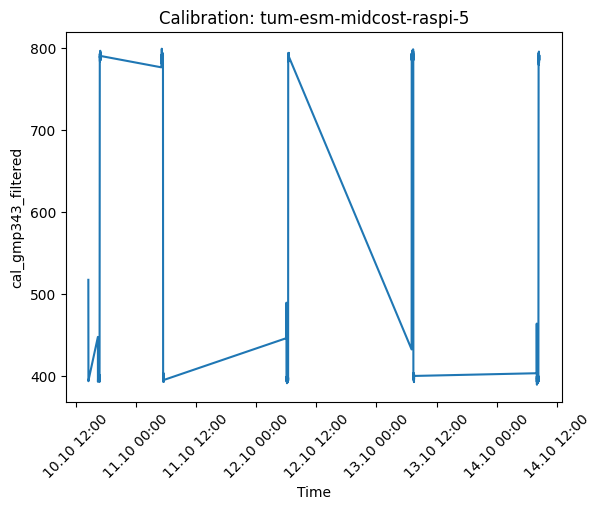

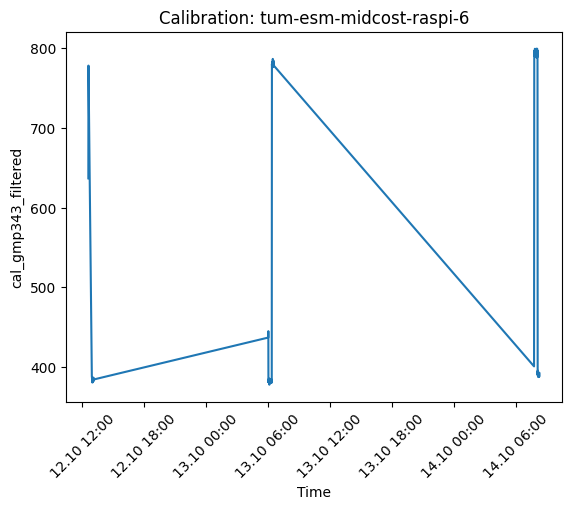

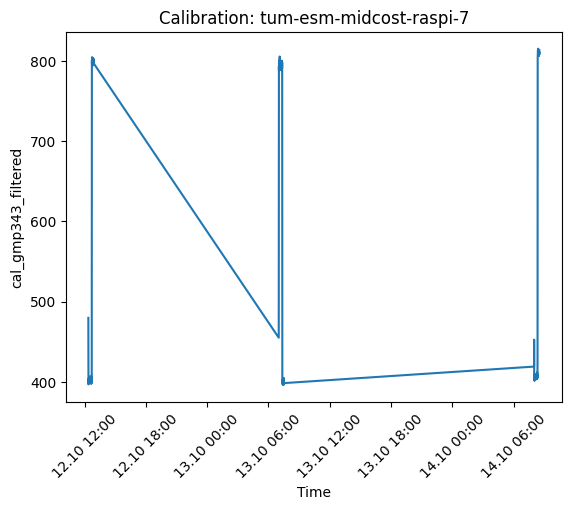

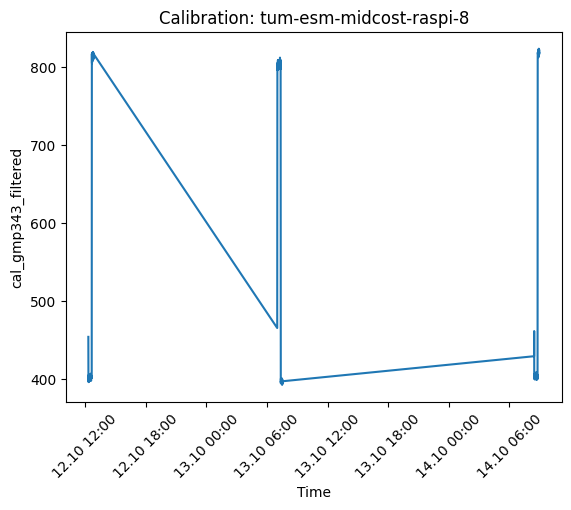

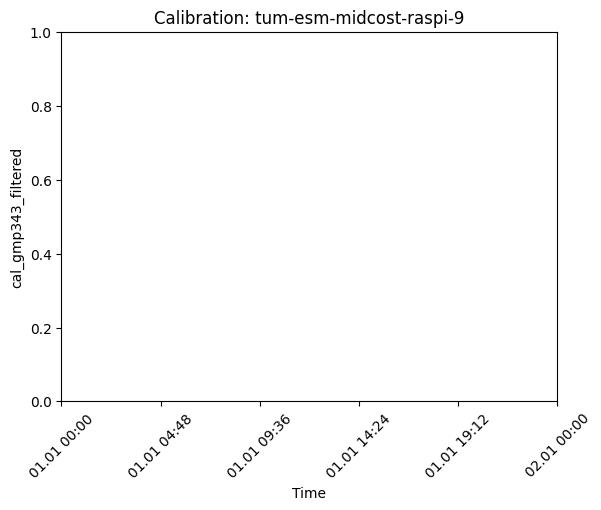

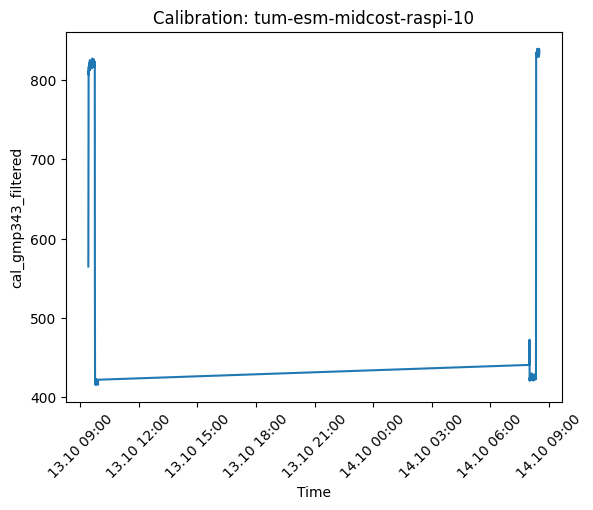

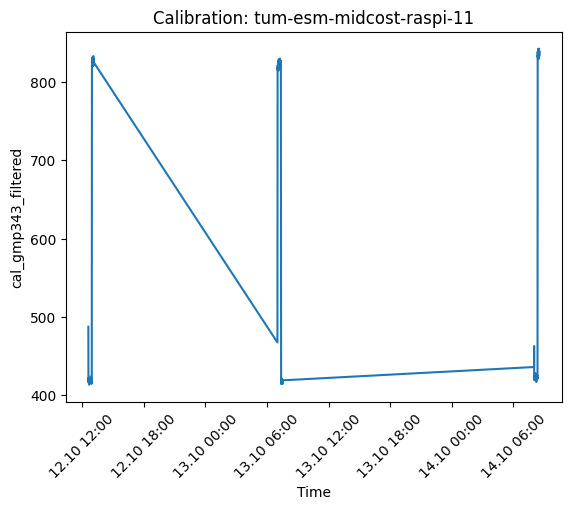

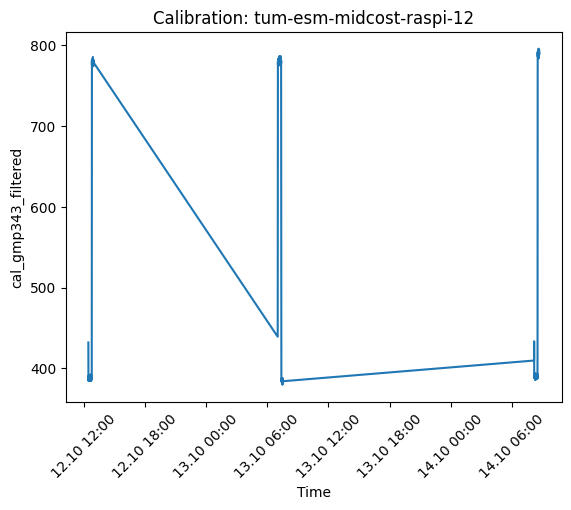

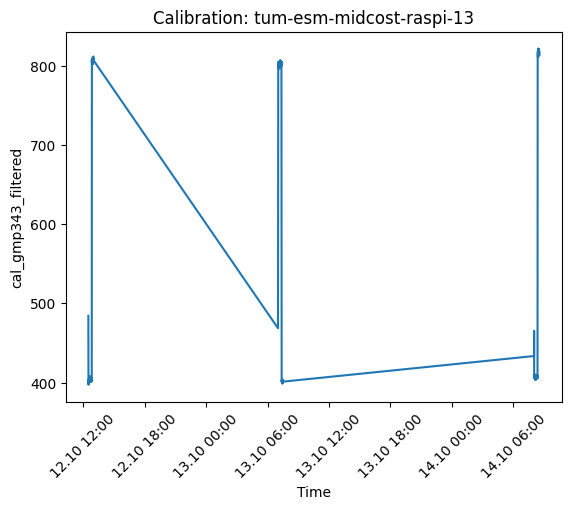

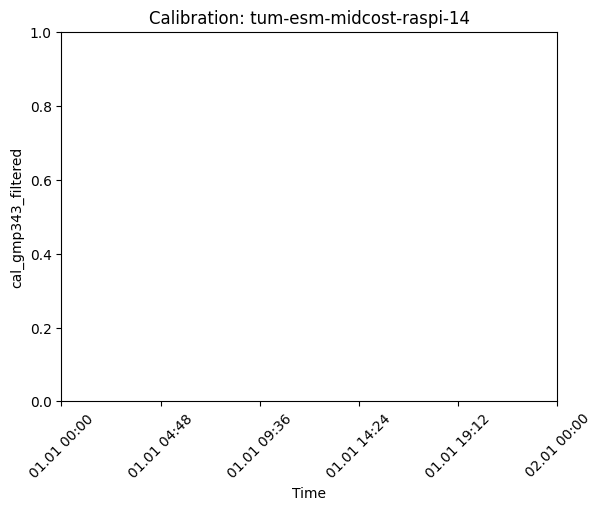

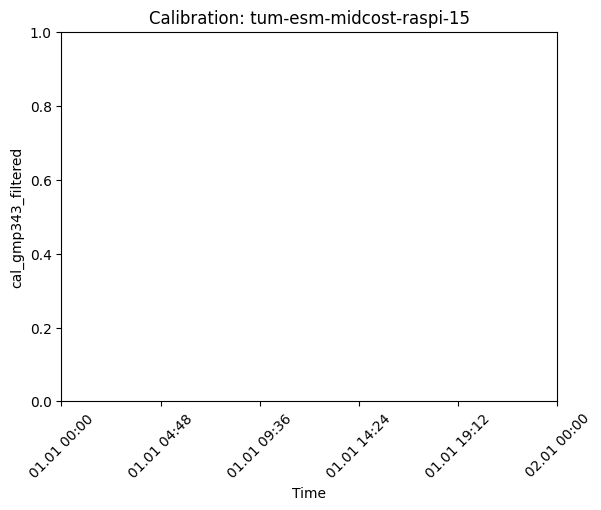

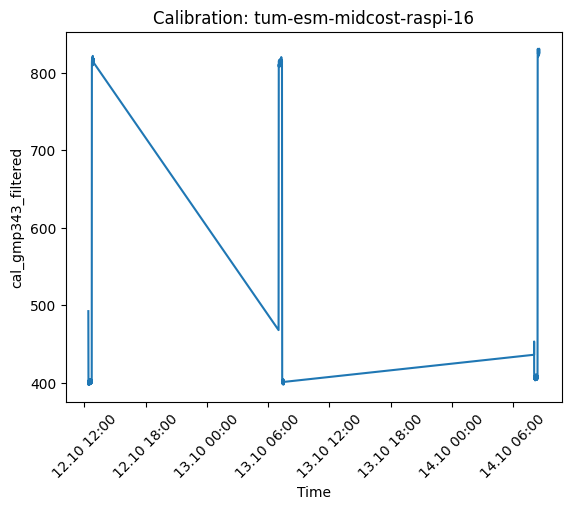

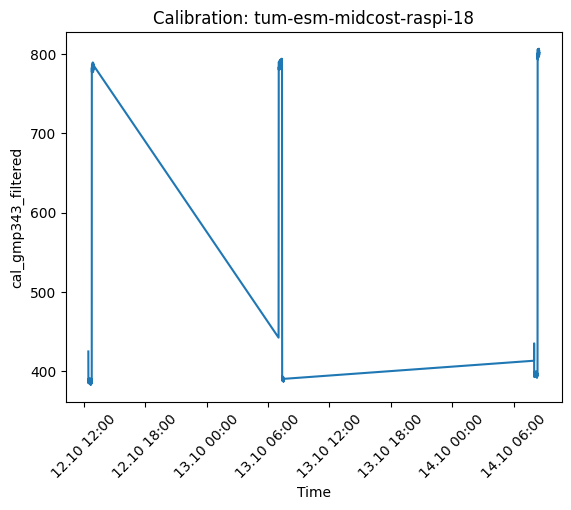

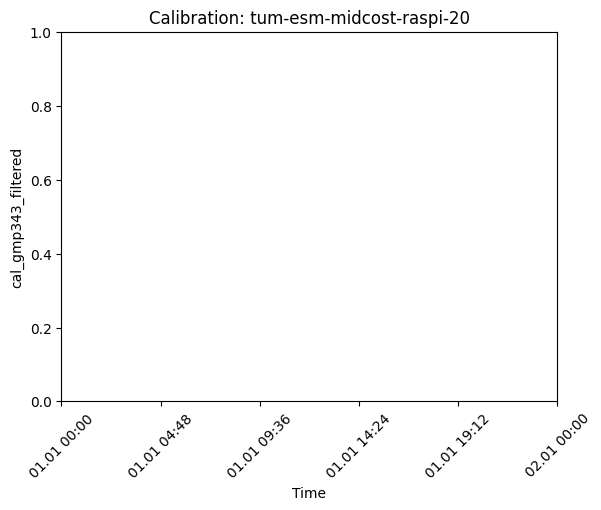

In [26]:
# Plot Calibration Data 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None)

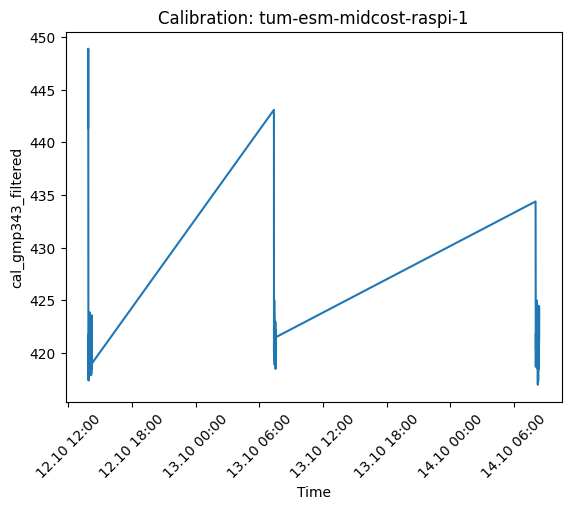

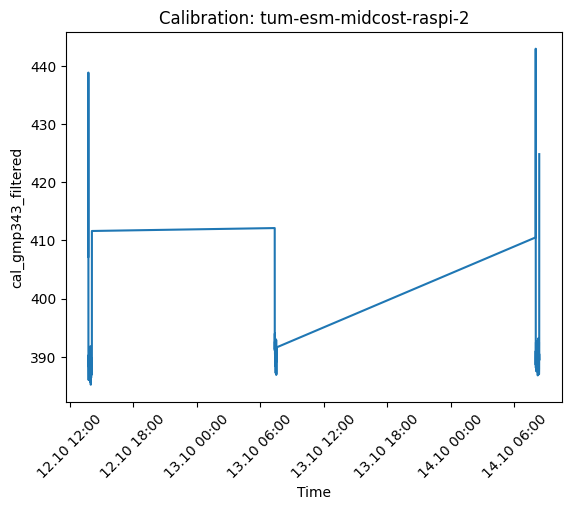

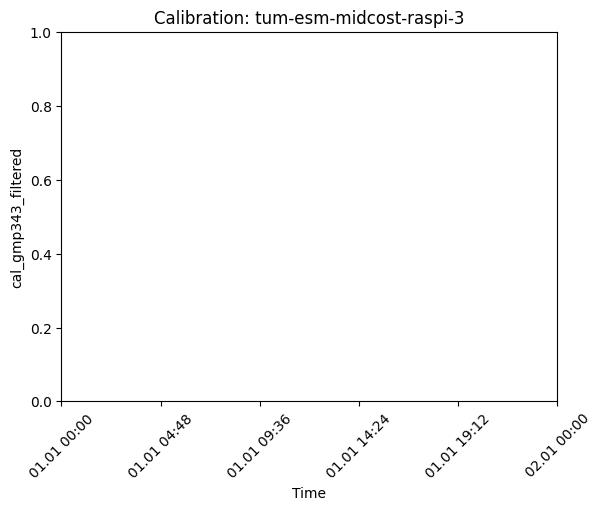

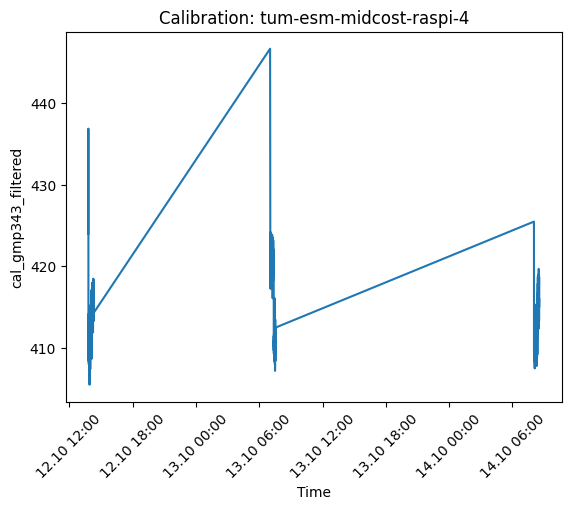

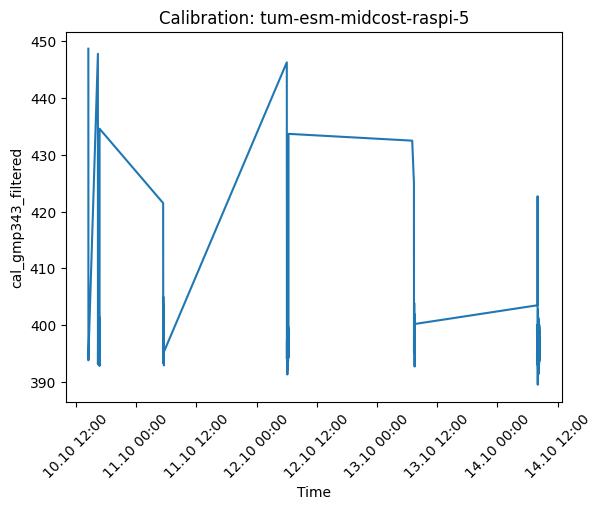

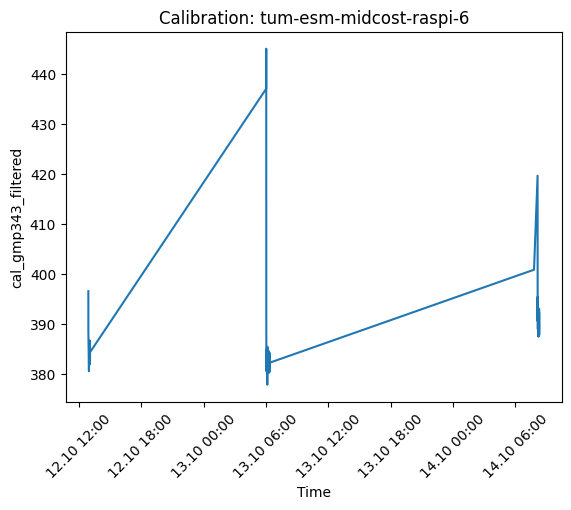

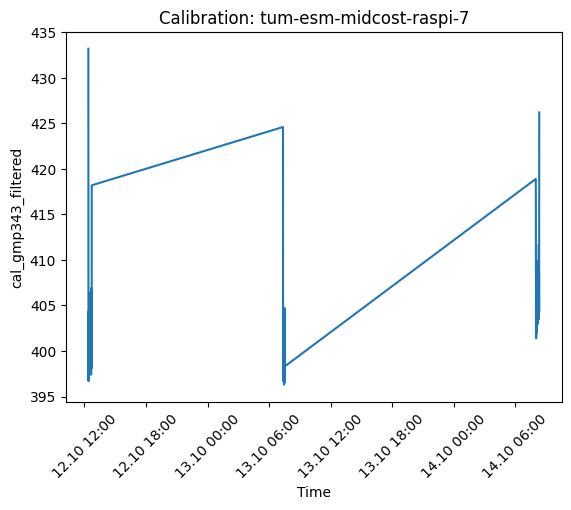

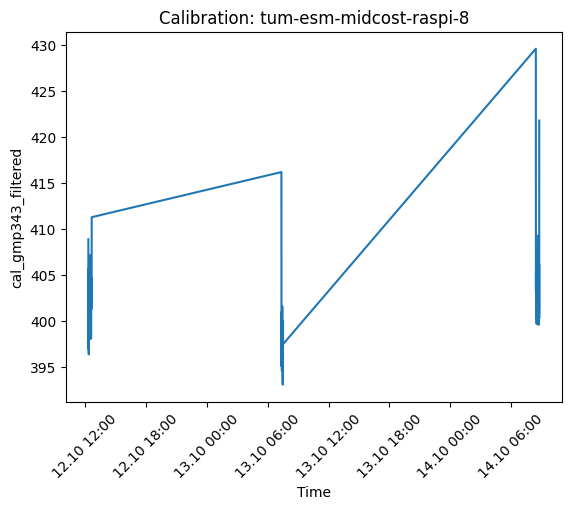

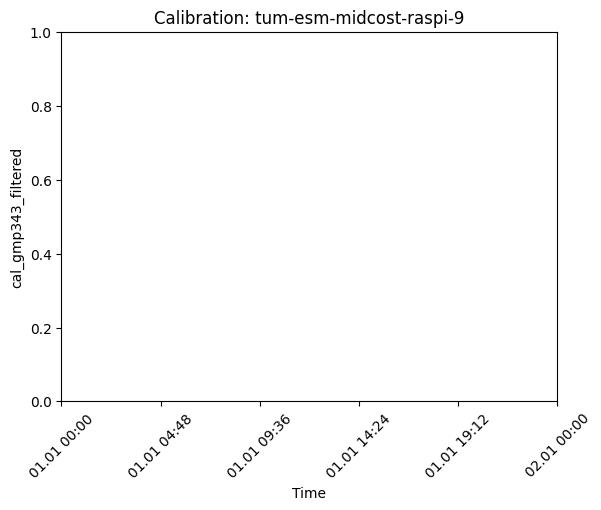

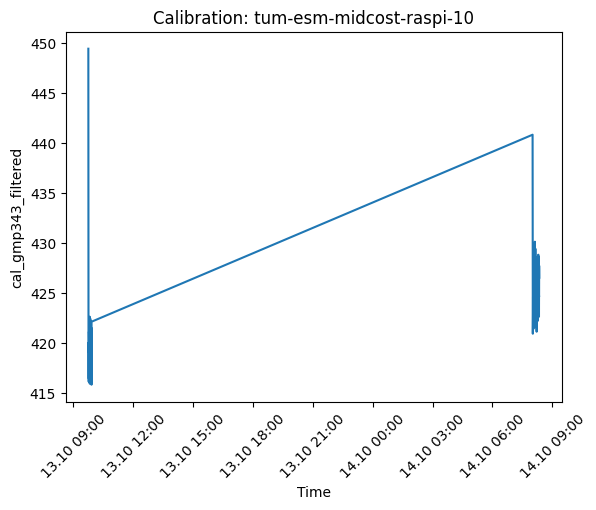

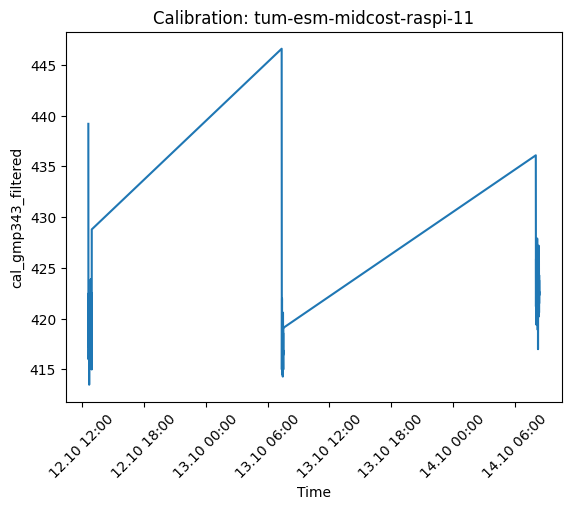

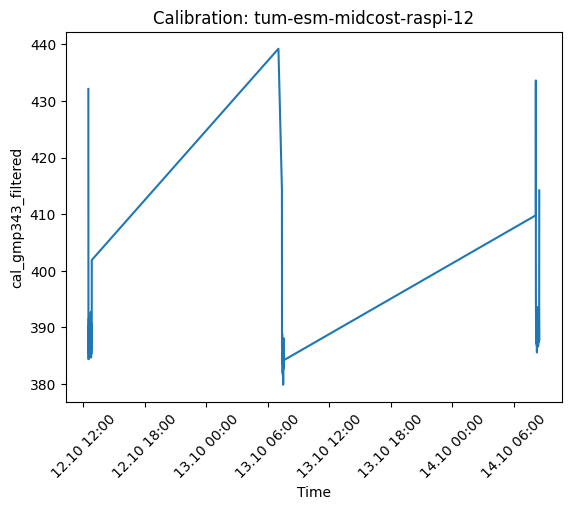

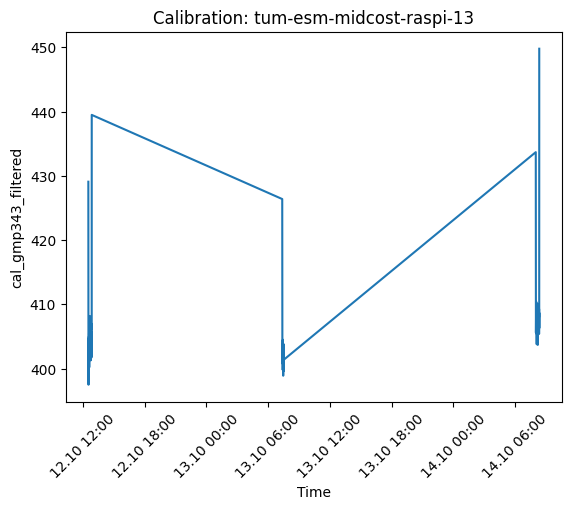

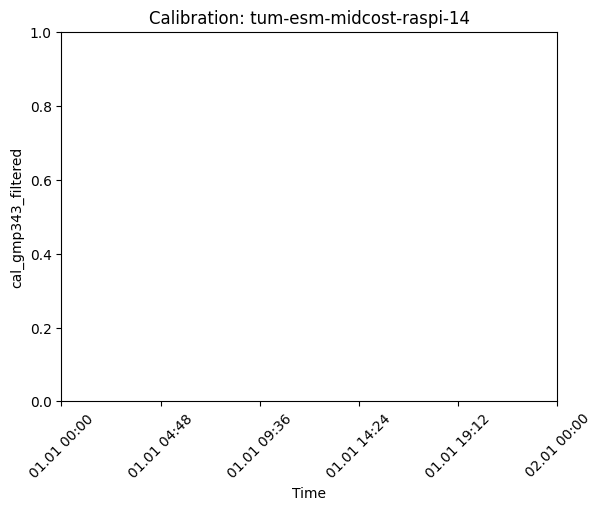

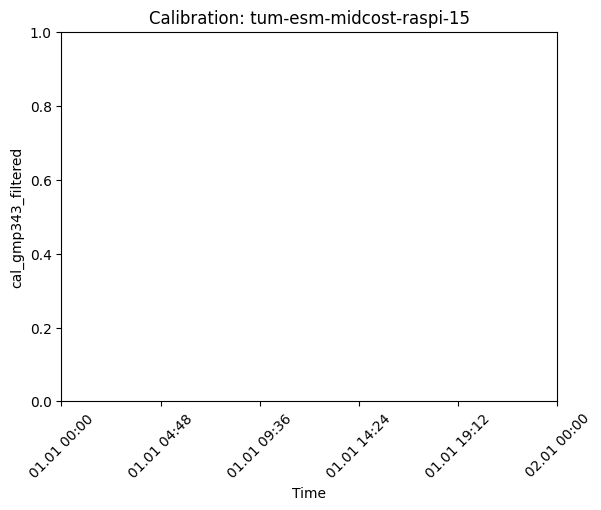

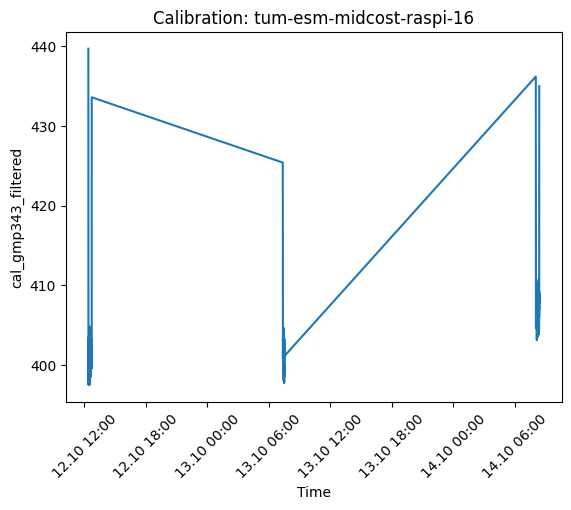

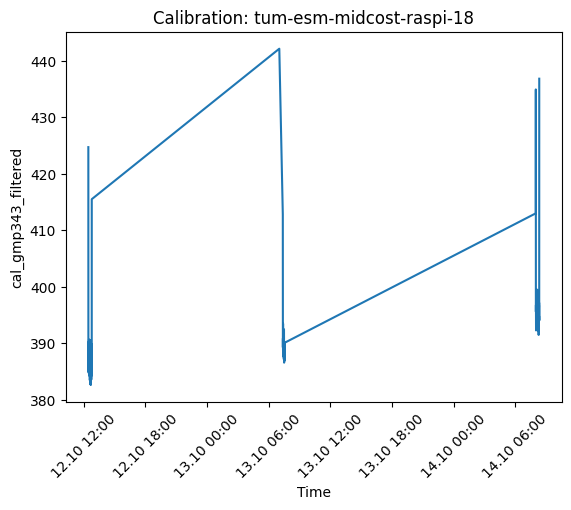

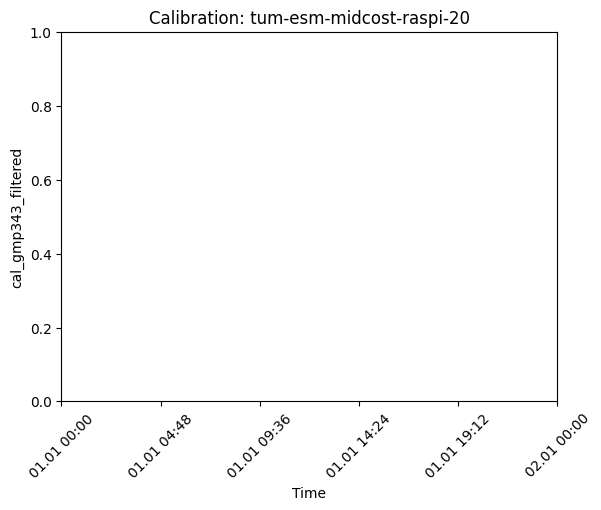

In [27]:
# Plot 400ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None, cut_above= 450, cut_below=350)


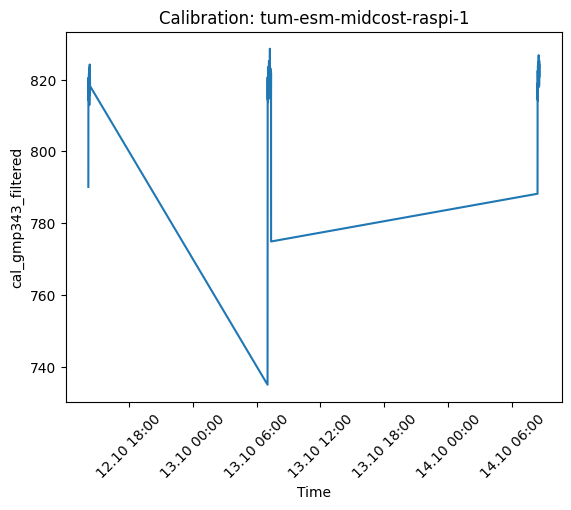

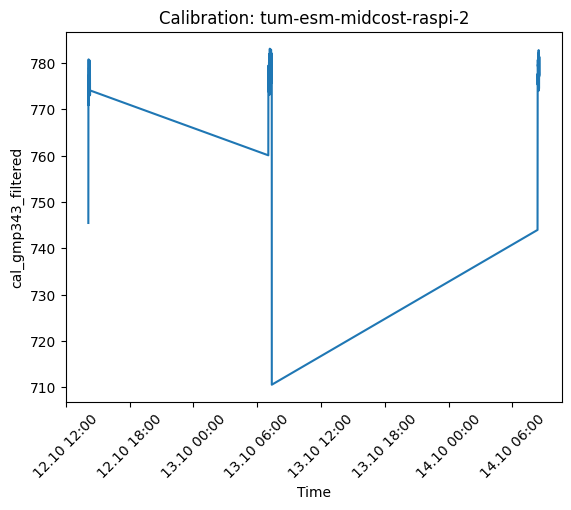

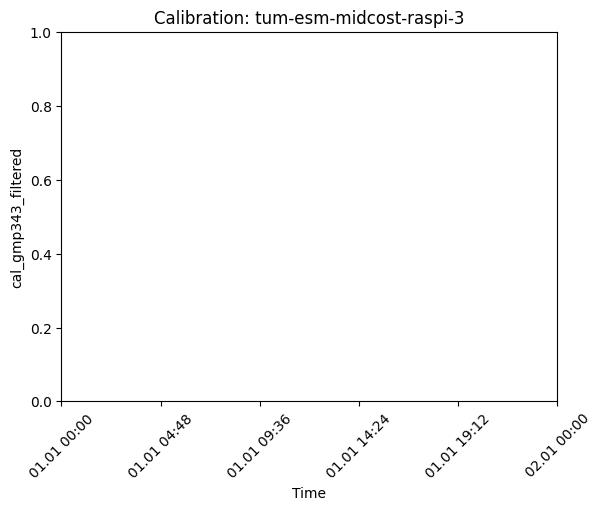

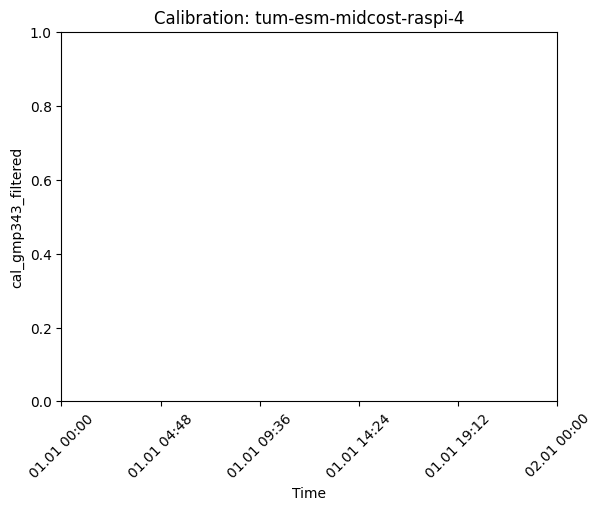

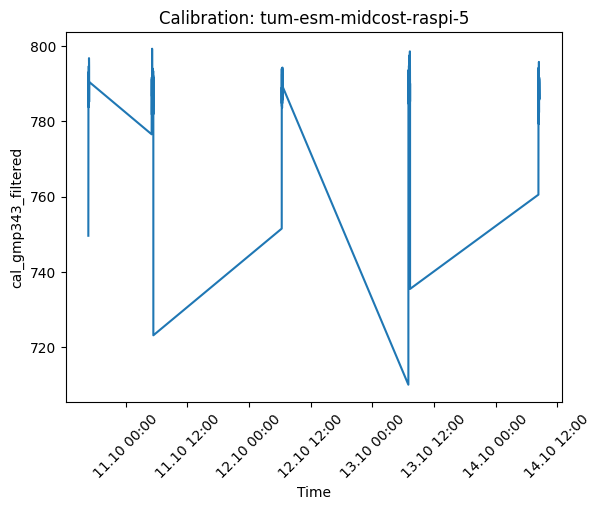

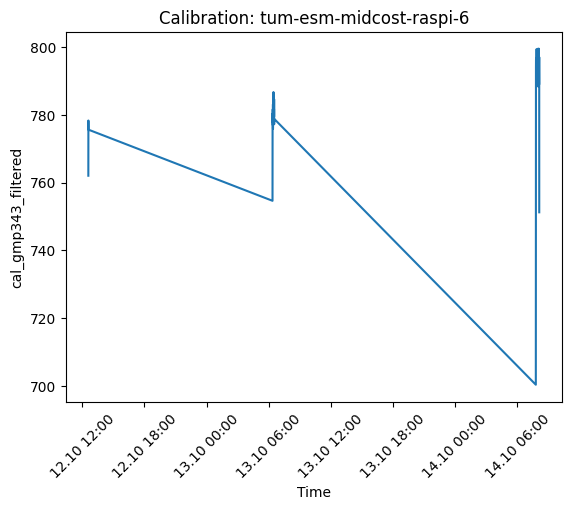

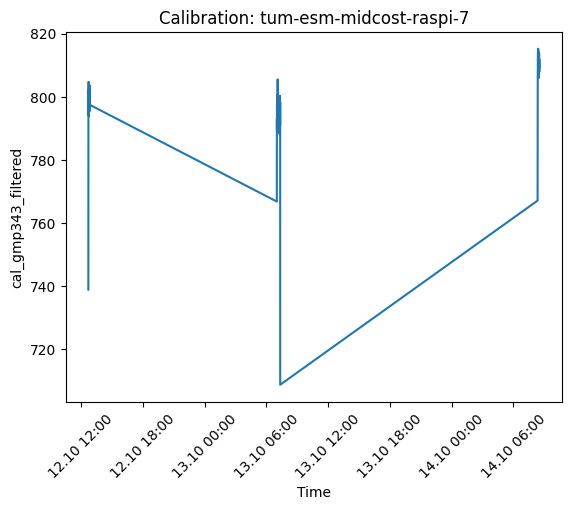

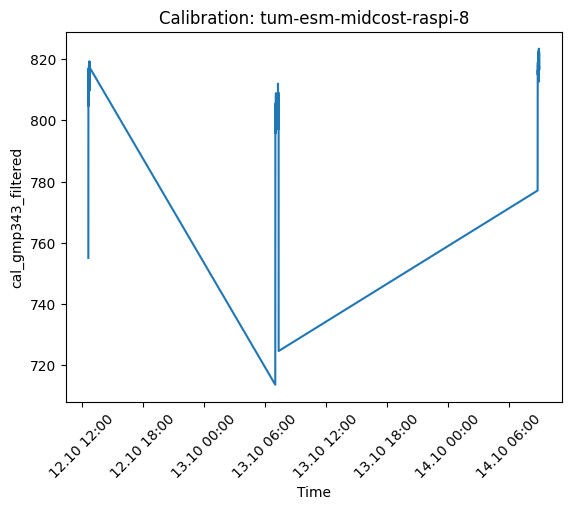

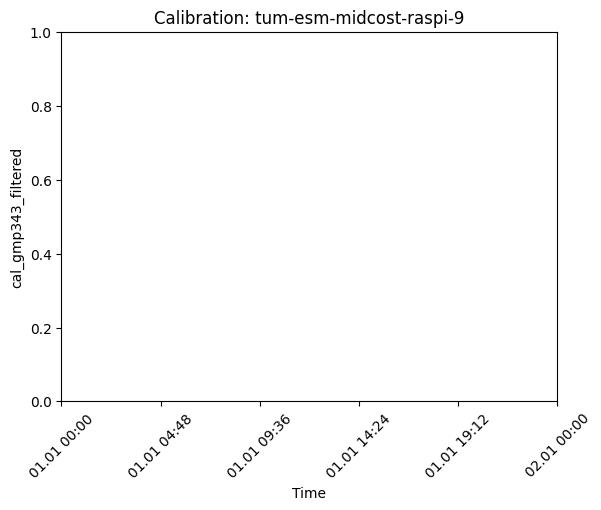

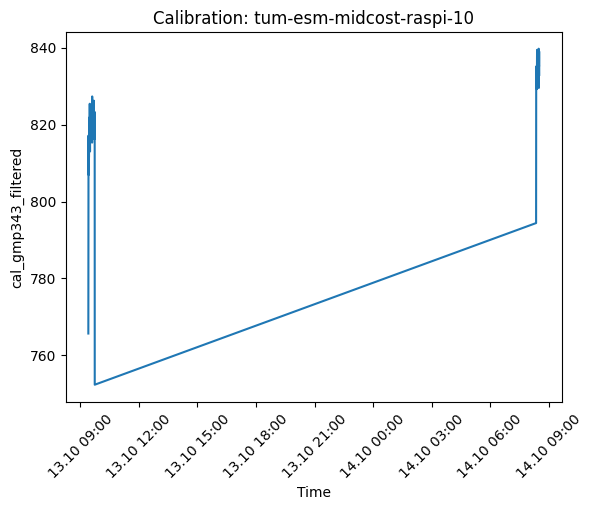

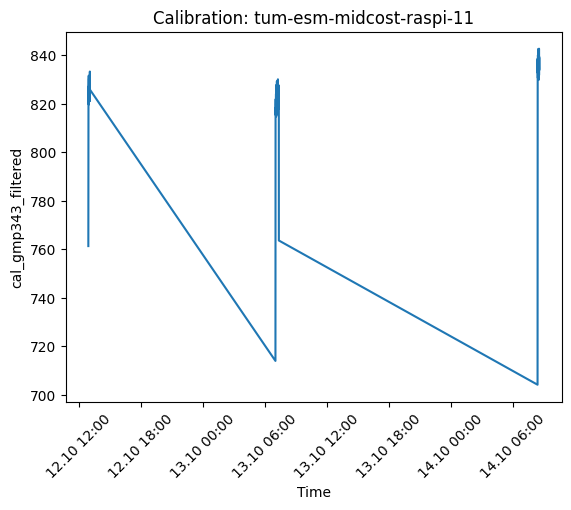

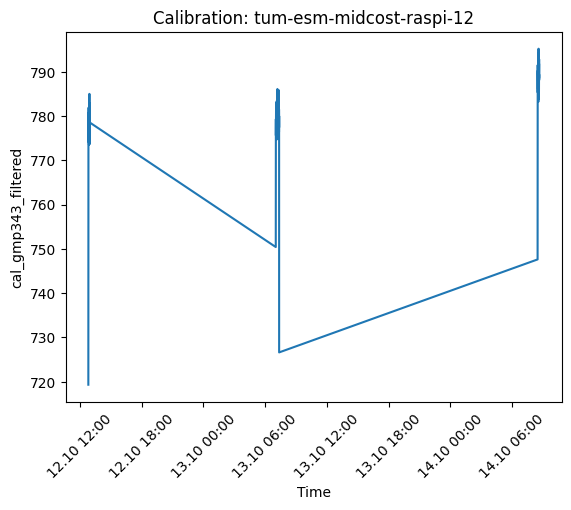

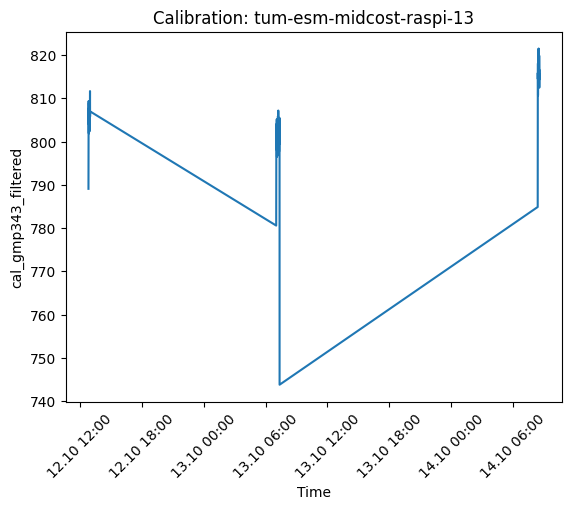

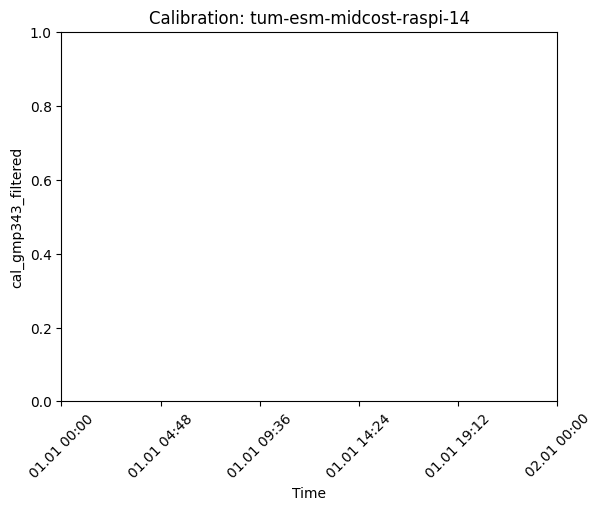

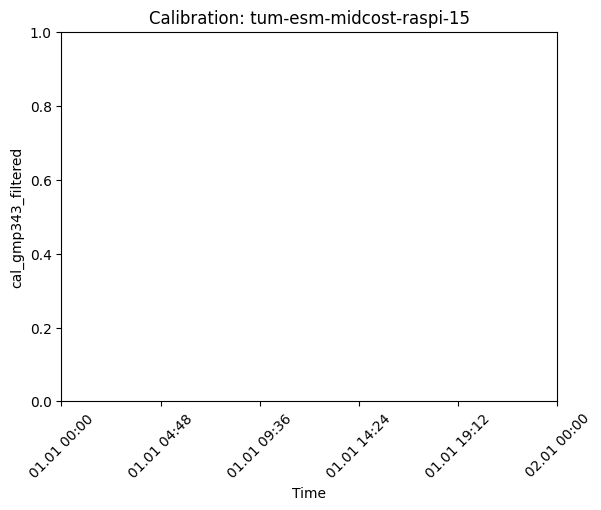

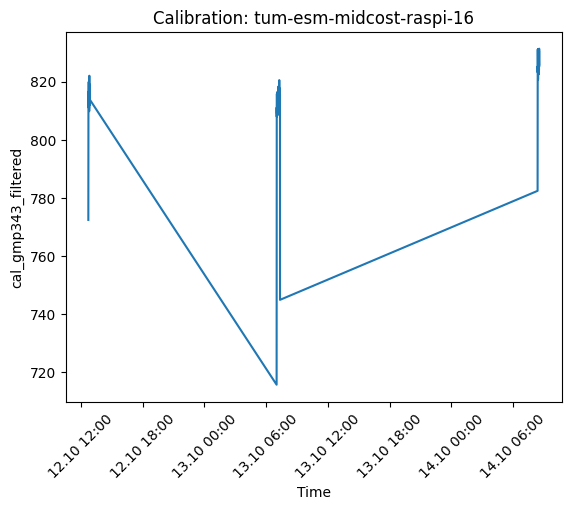

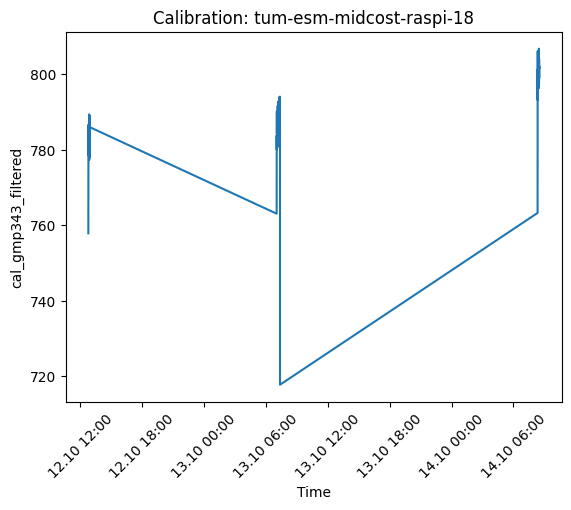

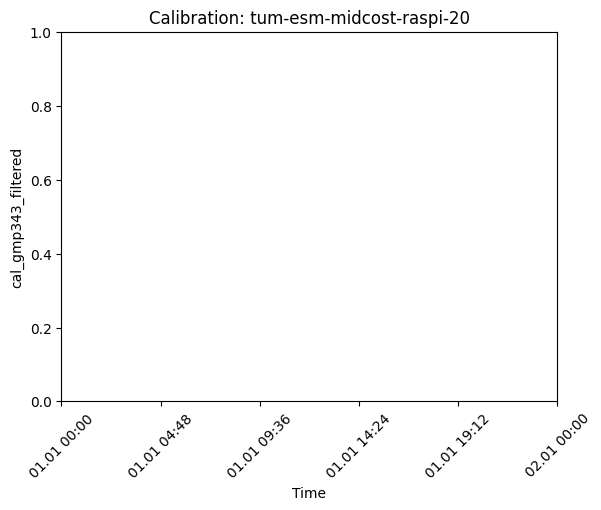

In [28]:
# Plot 800ppm Calibration Bottle 
plot_sensor_calibration(df, col_name = "cal_gmp343_filtered", sensor_id=sensor_id, filter = None, cut_below=700)